In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
N = 50
R = 0.5
M = int(N / R)
K = 3

## Sourlas Code

In [25]:
def messagePassage(N, M, K, J, partial_a, partial_i, beta, hInit = None, uInit = None):
    '''
        Parameters:
            N: the number of spins
            M : the number of J
            K: partial_a
            J: encoding message
            partial_i:
            partial_a:

        Return:
            F: free energy
            m_i: spin magnetication
    '''

    maxIteration = 200
    eps = 1e-4

    # initialize
    if hInit is None:
        h_i2a = np.random.uniform(0, 1, (N, M))
        # h_i2a = np.ones((N, M))
    else:
        h_i2a = hInit
    m_i = np.random.uniform(0, 1, N)
    if uInit is None:
        u_a2i = np.random.uniform(0, 1, (M, N))
        # u_a2i = np.ones((M, N))
    else:
        u_a2i = uInit
    last_mi = np.random.uniform(0, 1, N)

    # iteration
    flag = False
    for t in range(maxIteration):
        # update u
        htanh = np.tanh(beta * h_i2a)
        for a in range(M):
            for i in partial_a[a]:
                u_a2i[a, i] = np.arctanh(np.tanh(beta * J[a]) * np.prod(htanh[partial_a[a][partial_a[a] != i], a])) / beta
                # if np.abs(u_a2i[a, i]) < 1e-5:
                #     u_a2i[a, i] += 0.5
        # u_a2i[np.abs(u_a2i) < 1e-4] += 0.5

        # update h
        for i in range(N):
            for a in partial_i[i]:
                h_i2a[i, a] = np.sum(u_a2i[partial_i[i][partial_i[i] != a], i])
                # if np.abs(h_i2a[i, a]) < 1e-5:
                #     h_i2a[i, a] += 0.5
        # h_i2a[np.abs(h_i2a) < 1e-4] += 0.5

        # update m
        for i in range(N):
            m_i[i] = np.tanh(np.sum(beta * u_a2i[partial_i[i], i]))

        if np.max(np.abs(last_mi - m_i)) < eps:
            flag = True
            break
        last_mi = m_i.copy()


    if flag:
        print("p: {:.2f}, beta: {:.4f}, t: {} converge!".format(p, beta, t))
    else:
        print('p: {:.2f}, beta: {:.4f}: doesn\'t converage!'.format(p, beta))

    return m_i, flag, h_i2a, u_a2i

In [26]:
xi = np.random.choice([-1, 1], size=N, replace=True).astype(np.int64)
J = np.zeros(shape=M)

partial_a = np.zeros(shape=(M, K), dtype=np.int64)
partial_i = [[] for _ in range(N)]
for a in range(M):
    partial_a[a] = np.random.choice(N, K, replace=False)
    for i in partial_a[a]:
        partial_i[i].append(a)
    J[a] = np.prod(xi[partial_a[a]])

for i  in range(N):
    partial_i[i] = np.asarray(partial_i[i], dtype=np.int64)

def transfer(p, beta, hInit = None, uInit = None):
    J1 = J.copy()

    J1[np.random.rand(M) < p] *= -1

    m_i, flag, h, u = messagePassage(N, M, K, J1, partial_a, partial_i, beta, hInit, uInit)

    newXi = np.ones(shape=N, dtype=np.int64)
    newXi[m_i < 0] = -1

    accurateness = np.sum(xi == newXi) / N

    return accurateness, flag, h, u

In [44]:
p = 0.01
# beta = 5
beta = np.log((1-p)/p) / 2
a, flag, h, u = transfer(p, beta)
print(a)

p: 0.01, beta: 2.2976: doesn't converage!
0.54


In [45]:
pList = np.arange(0.01, 0.4, 0.01)
accurateList = []
h = None
u = None

for p in pList:
    beta = np.log((1-p)/p) / 2
    accurateList.append([])
    for _ in range(100):
        accurateness, flag, h, u = transfer(p, beta, h, u)
        if flag:
            accurateList[-1].append(accurateness)
        else:
            h = None
            u = None
        if len(accurateList[-1]) >= 5:
            break


p: 0.01, beta: 2.2976: doesn't converage!
p: 0.01, beta: 2.2976: doesn't converage!
p: 0.01, beta: 2.2976: doesn't converage!
p: 0.01, beta: 2.2976: doesn't converage!
p: 0.01, beta: 2.2976: doesn't converage!
p: 0.01, beta: 2.2976, t: 180 converge!
p: 0.01, beta: 2.2976, t: 1 converge!
p: 0.01, beta: 2.2976, t: 1 converge!
p: 0.01, beta: 2.2976, t: 1 converge!
p: 0.01, beta: 2.2976, t: 1 converge!
p: 0.02, beta: 1.9459, t: 1 converge!
p: 0.02, beta: 1.9459, t: 1 converge!
p: 0.02, beta: 1.9459, t: 1 converge!
p: 0.02, beta: 1.9459, t: 1 converge!
p: 0.02, beta: 1.9459, t: 1 converge!
p: 0.03, beta: 1.7380, t: 1 converge!
p: 0.03, beta: 1.7380, t: 3 converge!
p: 0.03, beta: 1.7380, t: 1 converge!
p: 0.03, beta: 1.7380, t: 1 converge!
p: 0.03, beta: 1.7380, t: 2 converge!
p: 0.04, beta: 1.5890, t: 2 converge!
p: 0.04, beta: 1.5890, t: 2 converge!
p: 0.04, beta: 1.5890, t: 2 converge!
p: 0.04, beta: 1.5890, t: 1 converge!
p: 0.04, beta: 1.5890, t: 2 converge!
p: 0.05, beta: 1.4722, t: 3 

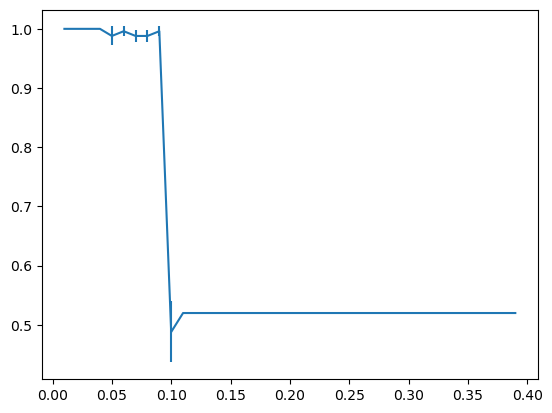

In [46]:
accurateMean = [np.mean(accurateness) for accurateness in accurateList]
accurateStd = [np.std(accurateness) for accurateness in accurateList]
plt.errorbar(pList, accurateMean, accurateStd)
plt.show()